# Selecting number of clusters with silhouette analysis on KMeans Clustering

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


## Generate sample data from make_blobs
One Distinct cluster, 3 clusters placed close together

In [9]:
X, y = make_blobs(n_samples=500,
                  n_features=2, 
                  centers=4, 
                  cluster_std=1,
                  center_box=(-10.0,10.0),
                  shuffle=True,
                  random_state=1)

range_n_clusters = np.arange(2,11)

For n_clusers =  2 Average Silhouette Score is :  0.704978749608


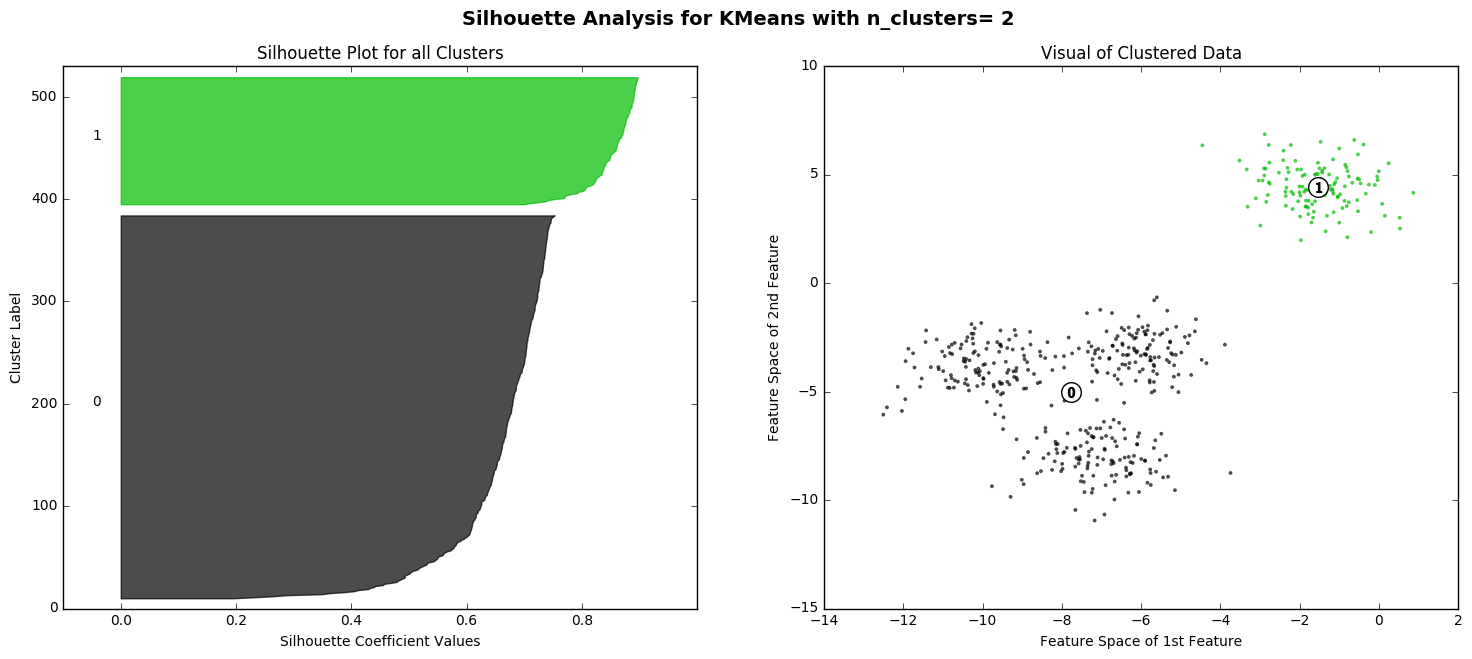

For n_clusers =  3 Average Silhouette Score is :  0.588200401213


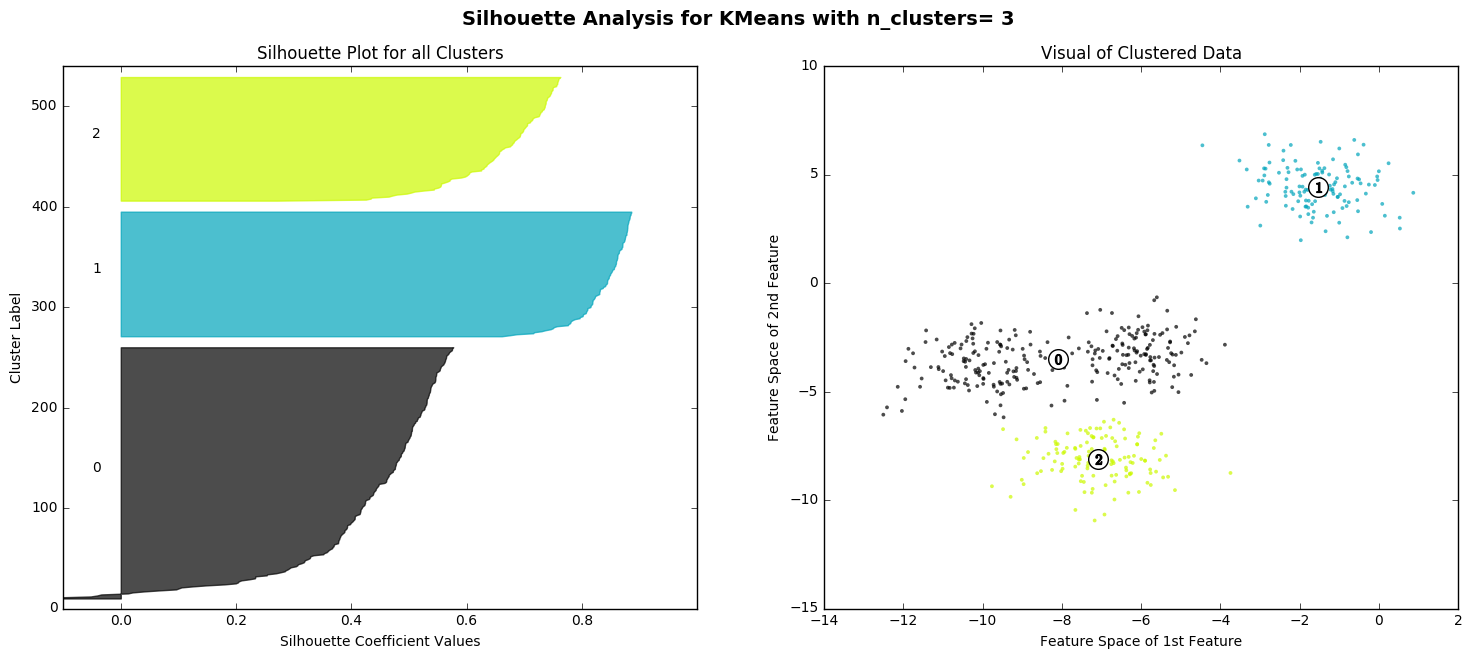

For n_clusers =  4 Average Silhouette Score is :  0.650518663273


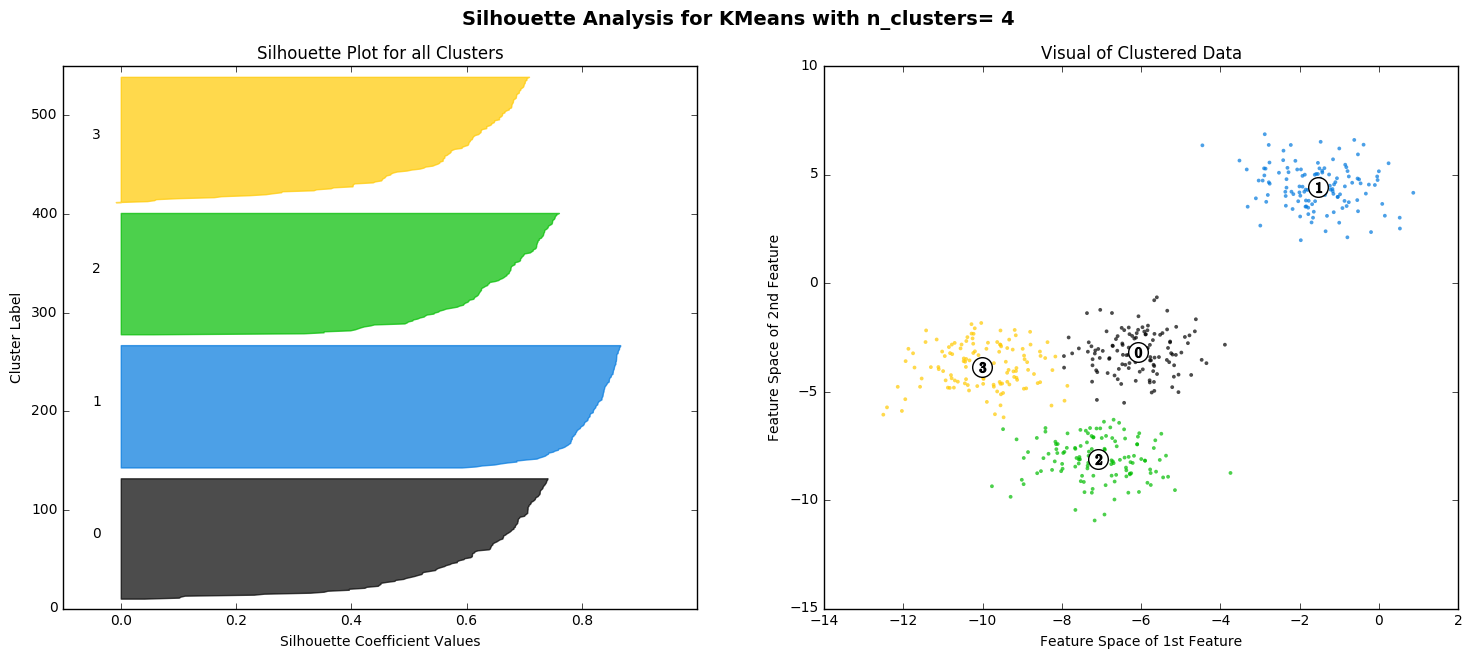

For n_clusers =  5 Average Silhouette Score is :  0.563764690262


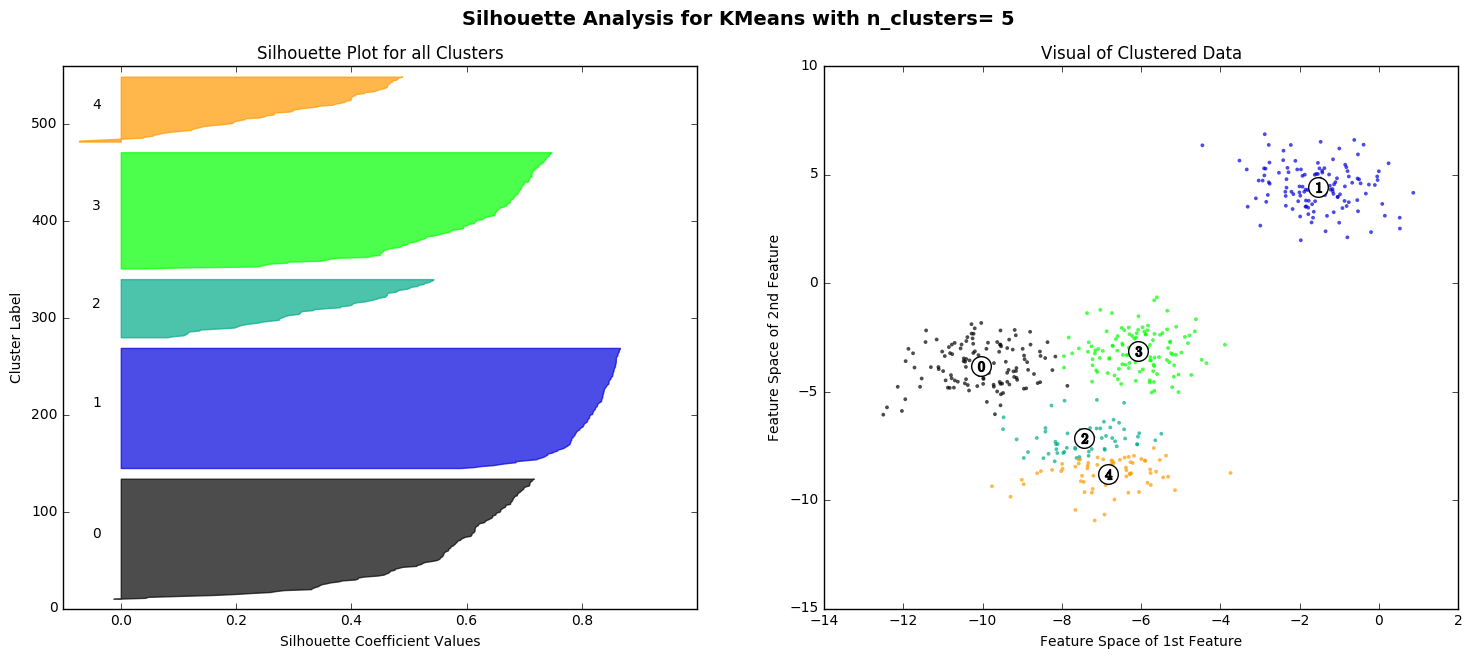

For n_clusers =  6 Average Silhouette Score is :  0.450466629437


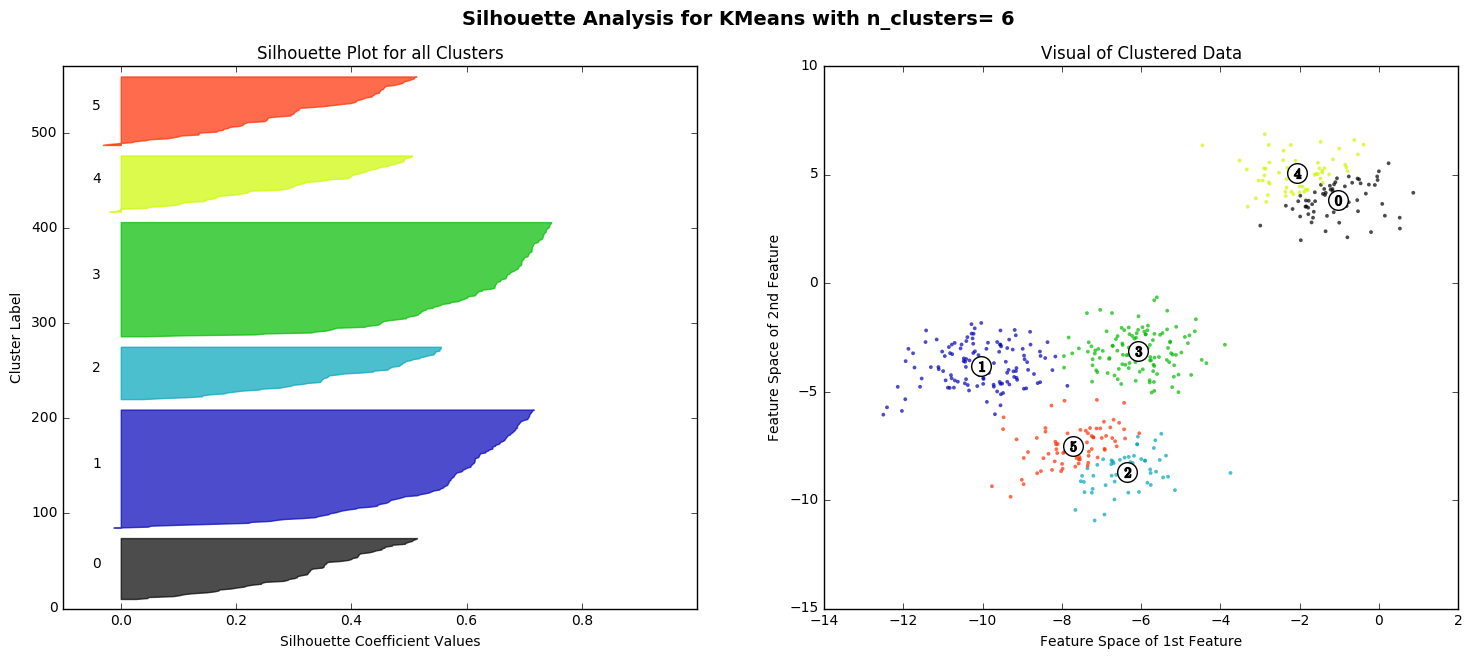

For n_clusers =  7 Average Silhouette Score is :  0.390922110299


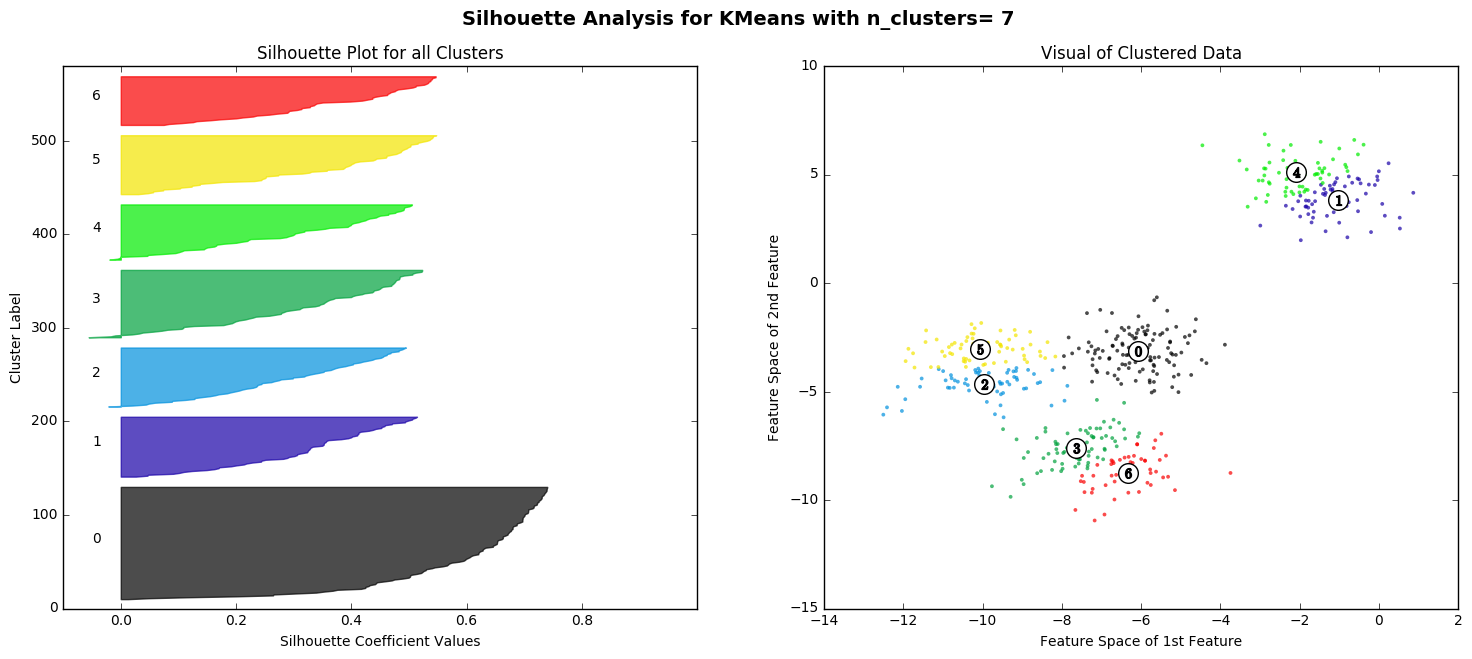

For n_clusers =  8 Average Silhouette Score is :  0.331485389965


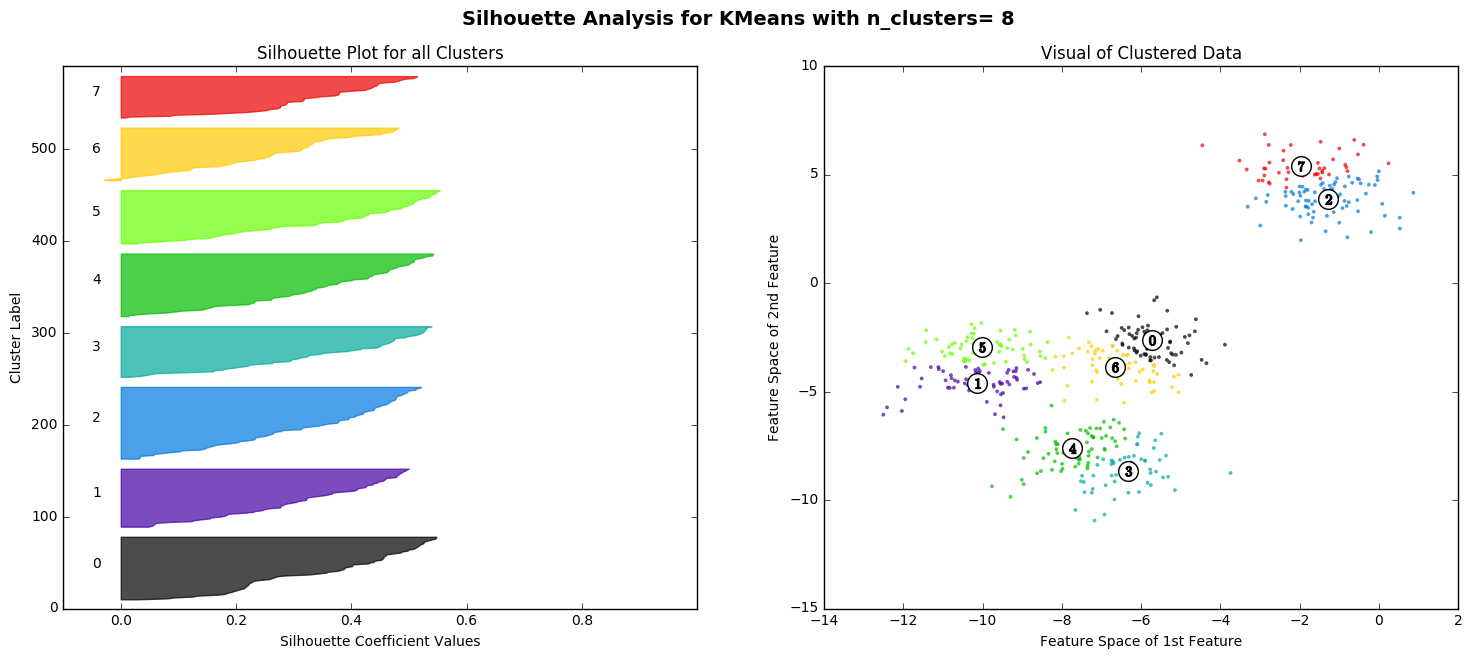

For n_clusers =  9 Average Silhouette Score is :  0.33498988187


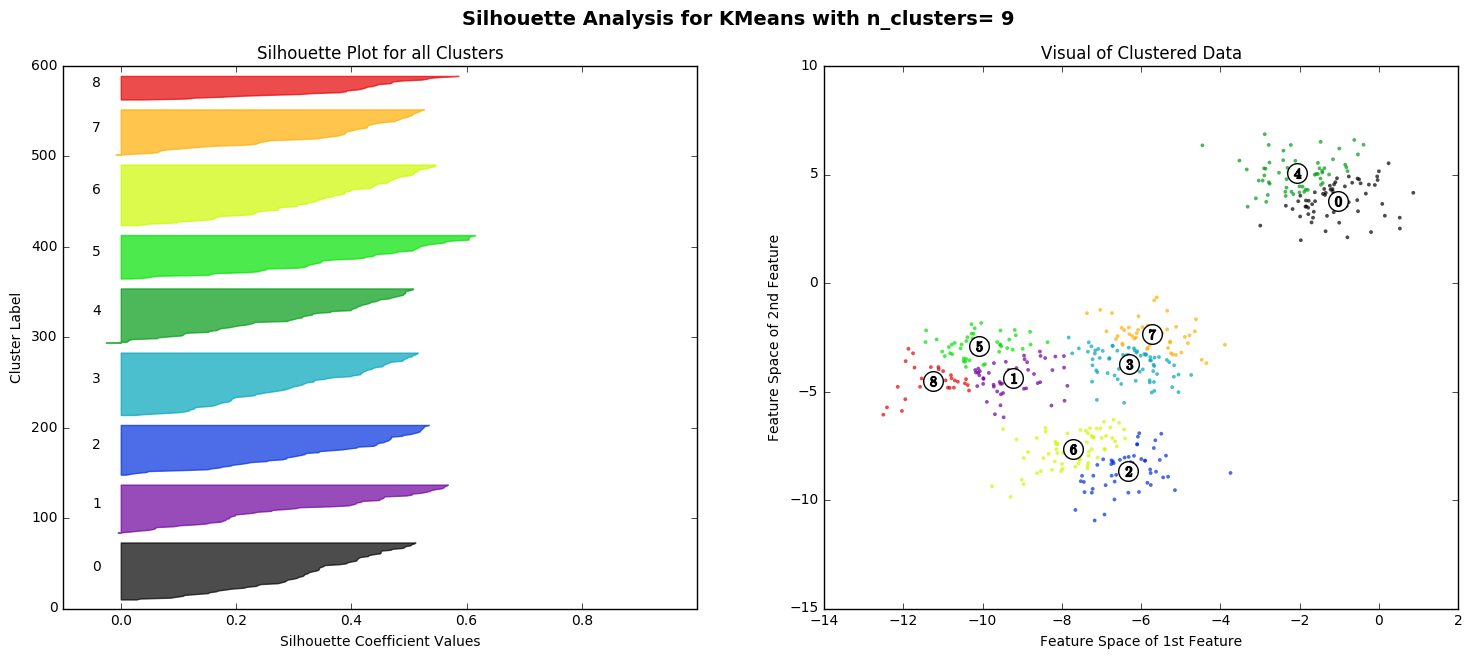

For n_clusers =  10 Average Silhouette Score is :  0.339292096484


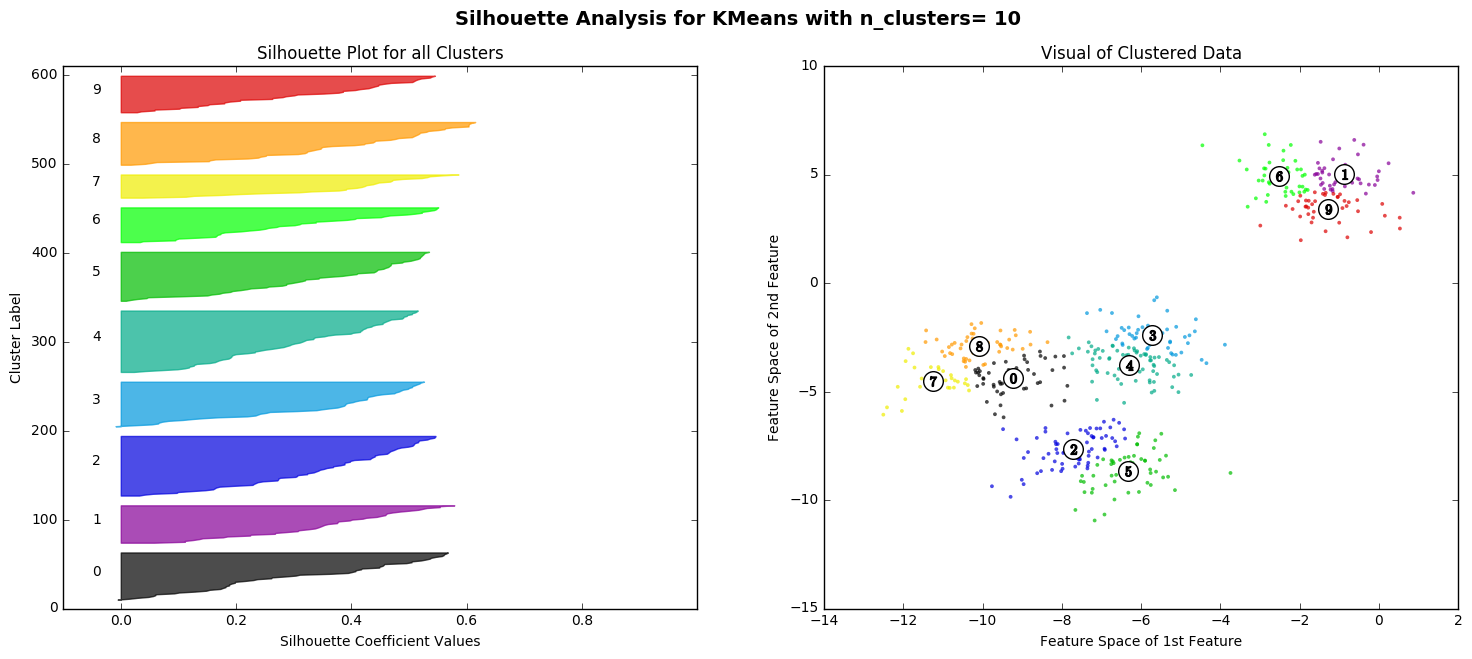

In [10]:
for n_clusters in range_n_clusters:
    #create subplot 1 row, 2 columns
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # Plot 1: Silhouette Plot
    # Silhouette from -1:1
    ax1.set_xlim([-0.1,1])
    
    # Insert Blank Space btwn. silhouette plots to separate clusters
    ax1.set_ylim([0,len(X)+(n_clusters + 1)*10])
    
    # Initialize Clusterer with n_clusters and a random seed of 10 (reproducable)
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # Silhouette Score gives average value for all samples
    # Look into Density and separation of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusers = ", n_clusters,
          "Average Silhouette Score is : ", silhouette_avg)
    
    # Compute Silhouette Scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Sorted Cluster i samples
        # Aggregate & Silhouette scores
        cluster_i_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]    
        
        cluster_i_silhouette_values.sort()
        
        size_cluster_i = cluster_i_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_i_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label Silhouette Plots with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 sample spacings
        
    ax1.set_title('Silhouette Plot for all Clusters')
    ax1.set_xlabel('Silhouette Coefficient Values')
    ax1.set_ylabel('Cluster Label')
    
    # 2nd Plot Showing Actual Clusters
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               c=colors)
    
    # Labeling Clusters
    centers = clusterer.cluster_centers_
    
    # Draw White Circles at cluster centers
    ax2.scatter(centers[:,0],centers[:,1],
               marker='o',c='white',alpha=1,s=200)
    
    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1, s=50)
        
    ax2.set_title('Visual of Clustered Data')
    ax2.set_xlabel('Feature Space of 1st Feature')
    ax2.set_ylabel('Feature Space of 2nd Feature')
    
    plt.suptitle(('Silhouette Analysis for KMeans ' 
                  'with n_clusters= %d' % n_clusters),
                fontsize=14, fontweight='bold')
    
    plt.show()
    